The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==1.0.3


# Implementation of Multilayer Perceptrons
:label:`sec_mlp-implementation`

Multilayer perceptrons (MLPs) are not much more complex to implement than simple linear models. The key conceptual
difference is that we now concatenate multiple layers.


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

## Implementation from Scratch

Let's begin again by implementing such a network from scratch.

### Initializing Model Parameters

Recall that Fashion-MNIST contains 10 classes,
and that each image consists of a $28 \times 28 = 784$
grid of grayscale pixel values.
As before we will disregard the spatial structure
among the pixels for now,
so we can think of this as a classification dataset
with 784 input features and 10 classes.
To begin, we will [**implement an MLP
with one hidden layer and 256 hidden units.**]
Both the number of layers and their width are adjustable
(they are considered hyperparameters).
Typically, we choose the layer widths to be divisible by larger powers of 2.
This is computationally efficient due to the way
memory is allocated and addressed in hardware.

Again, we will represent our parameters with several tensors.
Note that *for every layer*, we must keep track of
one weight matrix and one bias vector.
As always, we allocate memory
for the gradients of the loss with respect to these parameters.


In the code below we use `nn.Parameter`
to automatically register
a class attribute as a parameter to be tracked by `autograd` (:numref:`sec_autograd`).


In [3]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

### Model

To make sure we know how everything works,
we will [**implement the ReLU activation**] ourselves
rather than invoking the built-in `relu` function directly.


In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

Since we are disregarding spatial structure,
we `reshape` each two-dimensional image into
a flat vector of length  `num_inputs`.
Finally, we (**implement our model**)
with just a few lines of code. Since we use the framework built-in autograd this is all that it takes.


In [5]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

### Training

Fortunately, [**the training loop for MLPs
is exactly the same as for softmax regression.**] We define the model, data, and trainer, then finally invoke the `fit` method on model and data.


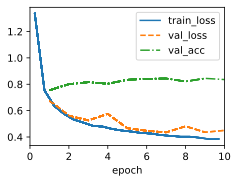

In [17]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### **Var. 1**: Smaller

Training a smaller hidden layer variant. `num_hiddens = 64`

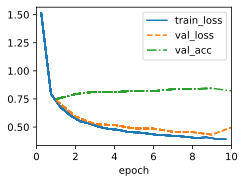

In [6]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=64, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### **Var. 2**: Medium-large

Training a medium-large hidden layer variant. `num_hiddens = 512`

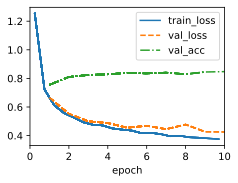

In [18]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=512, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### **Var. 3**: Larger

Training a larger hidden layer variant. `num_hiddens = 2048`

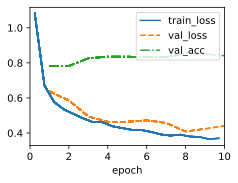

In [15]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=2048, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### **Var. 4**: Larger x2

Training a larger x2 hidden layer variant. `num_hiddens = 4096`

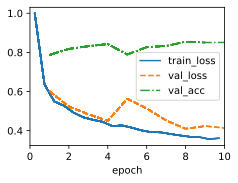

In [16]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=4096, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### Comparing models

- **Var. 1** model generates a higher `train_loss` curve, indicating a lower learning capacity (both for signal and noise). Furthermore, the accuracy (`val_acc`) is also inferior to the others.

- **Var. 2** model achieves more balanced results than the previous one. The `train_loss` curve is similar to those of the models with higher `num_hiddens` (Var. 3 and Var. 4). Furthermore, the proximity from `val_loss` curve to the `train_loss` curve indicates a better learning capacity for signal, which demonstrates that the model has good generalization capacity.

- In the **Var. 3** model results it is possible to see that, although the accuracy is slightly superior to that of Var. 2, in some epochs the `val_loss` curve moves considerably away from `train_loss`, varying to higher values, which indicate occurrences of *overfitting*.

- Although during the first epochs it presents good accuracy and less evidence of *overfitting*, the model **Var. 4** presents a sharp variation in the `val_loss` curve, which reaches, from the 4th epoch onwards, values ​​much higher than those of the previous models. Accuracy, at this point, is also negatively affected.

#### Discussion
The results show a *trade-off* between model complexity and generalization capacity as the value of `num_hiddens` changes. **Var. 1** suffers less accuracy, while **Var. 2** presents better learning and generalization. **Var. 3** has a slight gain in accuracy, but clear signs of *overfitting*. **Var. 4** initially performs well, but suffers exacerbated variation in `val_loss`, indicating strong *overfitting*.

### Experimenting with Learning Rate

Changing the Learning Rate of the most-balanced model (**Var. 2**), which was originally 0.1.

#### Exp. 1: `lr = 0.01`

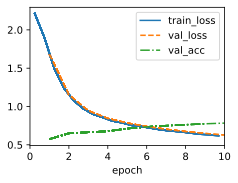

In [19]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=512, lr=0.01)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### Exp. 2: `lr = 0.5`

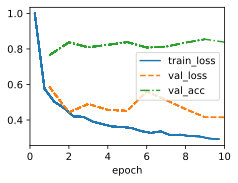

In [20]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=512, lr=0.5)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### Discussion

- In **Exp. 1**, although `val_error` is consistently low, the accuracy (`val_acc`) also remains lower, surpassing `train_loss` only after the 6th epoch. Even so, the observed accuracy remains low for the duration of training. This displays that the model, as expected upon reducing the learning rate, learns slowly and takes a long time to absorb relevant results.

- In **Exp. 2**, the `val_error` curve shows great variation, reaching high peaks from the 6th epoch onwards, suggesting expressive overfitting. The model learns quickly at the beginning (up to the 2nd epoch, approximately), but loses generalization capacity throughout training.

These results indicate that a very low value can lead to inefficient training, while a very high value can result in instability and overfitting of the model.